In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
fpaths = "../testes_seq_paral/test_staub_tudo_test_new_n/"

sizes = ["small", "medium", "large"]
threads = [2, 4, 8, 16]
threads_mpi_pthreads = [6, 8, 10, 12, 18]
speedups = []

In [5]:
sequenciais = []

for i in sizes:
    sequencial_local = []
    with open(f"{fpaths}logs_sequencial/log_seq_{i}_out.txt", "r") as arquivo:
        print(i)
        for linha in arquivo:
            if "seconds time elapsed" in linha:
                aux = linha.split("seconds")
                aux = aux[0]
                aux = float(aux.replace(",", "."))
                print(float(aux))
                sequencial_local.append(float(aux))
    print(len(sequencial_local))
    sequenciais.append(np.mean(sequencial_local))

small
6.172511184
1
medium
49.395696244
1
large
395.194071767
1


In [6]:
paralelos_pthread = []

for i in sizes:
    for j in threads:
        paralelo_local = []
        print(f"pthreads - {i} threads {j}")
        with open(f"{fpaths}logs_paralelo/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "seconds time elapsed" in linha:
                    aux = linha.split("seconds")
                    aux = aux[0]
                    aux = float(aux.replace(",", "."))
                    print(float(aux))
                    paralelo_local.append(float(aux))
        print(len(paralelo_local))
        paralelos_pthread.append(np.mean(paralelo_local))

pthreads - small threads 2
3.073429108
1
pthreads - small threads 4
1.692261817
1
pthreads - small threads 8
1.708056872
1
pthreads - small threads 16
1.696009687
1
pthreads - medium threads 2
26.520921691
1
pthreads - medium threads 4
16.215741895
1
pthreads - medium threads 8
18.43970747
1
pthreads - medium threads 16
18.654614156
1
pthreads - large threads 2
227.168054793
1
pthreads - large threads 4
148.102127652
1
pthreads - large threads 8
149.769712537
1
pthreads - large threads 16
150.040980621
1


In [7]:
paralelos_mpi = []

for i in sizes:
    for j in threads:
        paralelo_local = []
        print(f"mpi - {i} threads {j}")
        with open(f"{fpaths}logs_mpi/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "seconds time elapsed" in linha:
                    aux = linha.split("seconds")
                    aux = aux[0]
                    aux = float(aux.replace(",", "."))
                    print(float(aux))
                    paralelo_local.append(float(aux))
        print(len(paralelo_local))
        paralelos_mpi.append(np.mean(paralelo_local))

mpi - small threads 2
3.799645224
1
mpi - small threads 4
2.640205839
1
mpi - small threads 8
2.882069548
1
mpi - small threads 16
4.822252434
1
mpi - medium threads 2
28.699057478
1
mpi - medium threads 4
18.904017203
1
mpi - medium threads 8
19.021922087
1
mpi - medium threads 16
21.477618908
1
mpi - large threads 2
225.931469812
1
mpi - large threads 4
148.091964971
1
mpi - large threads 8
147.455471776
1
mpi - large threads 16
161.153232794
1


In [11]:
pthreads_mpi = []

for i in sizes:
    for j in threads_mpi_pthreads:
        paralelo_local = []
        print(f"mpi - {i} threads {j}")
        with open(f"{fpaths}logs_pthread_mpi/log_pthread_mpi_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "seconds time elapsed" in linha:
                    aux = linha.split("seconds")
                    aux = aux[0]
                    aux = float(aux.replace(",", "."))
                    print(float(aux))
                    paralelo_local.append(float(aux))
        print(len(paralelo_local))
        pthreads_mpi.append(np.mean(paralelo_local))

mpi - small threads 6
4.208467156
1
mpi - small threads 8
3.406389947
1
mpi - small threads 10
3.181054803
1
mpi - small threads 12
4.323150915
1
mpi - small threads 18
3.174561633
1
mpi - medium threads 6
32.126551447
1
mpi - medium threads 8
25.096097371
1
mpi - medium threads 10
21.847203432
1
mpi - medium threads 12
31.755549612
1
mpi - medium threads 18
21.731018087
1
mpi - large threads 6
254.265534888
1
mpi - large threads 8
198.370326867
1
mpi - large threads 10
176.758705311
1
mpi - large threads 12
250.630996669
1
mpi - large threads 18
167.84537723
1


In [15]:
speedups_pthreads = []

aux = 0
speedup_local = [sequenciais[0] / paralelos_pthread[i] for i in range(aux,len(threads))] 
speedups_pthreads.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[1] / paralelos_pthread[i] for i in range(aux,aux+len(threads))] 
speedups_pthreads.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[2] / paralelos_pthread[i] for i in range(aux,aux+len(threads))]
speedups_pthreads.append(speedup_local)

In [17]:
speedups_mpi = []

aux = 0
speedup_local = [sequenciais[0] / paralelos_mpi[i] for i in range(aux,len(threads))] 
speedups_mpi.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[1] / paralelos_mpi[i] for i in range(aux,aux+len(threads))] 
speedups_mpi.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[2] / paralelos_mpi[i] for i in range(aux,aux+len(threads))]
speedups_mpi.append(speedup_local)

In [21]:
speedups_mpi_pthreads = []

aux = 0
speedup_local = [sequenciais[0] / pthreads_mpi[i] for i in range(aux,len(threads_mpi_pthreads))] 
speedups_mpi_pthreads.append(speedup_local)
aux += len(threads_mpi_pthreads)
speedup_local = [sequenciais[1] / pthreads_mpi[i] for i in range(aux,aux+len(threads_mpi_pthreads))] 
speedups_mpi_pthreads.append(speedup_local)
aux += len(threads_mpi_pthreads)
speedup_local = [sequenciais[2] / pthreads_mpi[i] for i in range(aux,aux+len(threads_mpi_pthreads))]
speedups_mpi_pthreads.append(speedup_local)

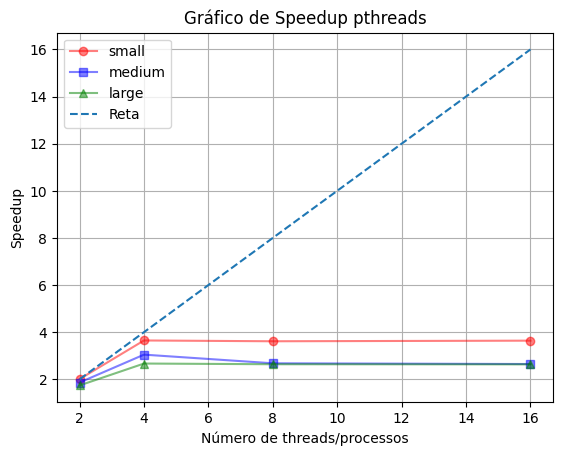

In [19]:
plt.plot(threads, speedups_pthreads[0], label='small', color='red', marker='o', alpha=0.5)
plt.plot(threads, speedups_pthreads[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads, speedups_pthreads[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads, threads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup pthreads')
plt.grid(True)
plt.legend()
plt.show()

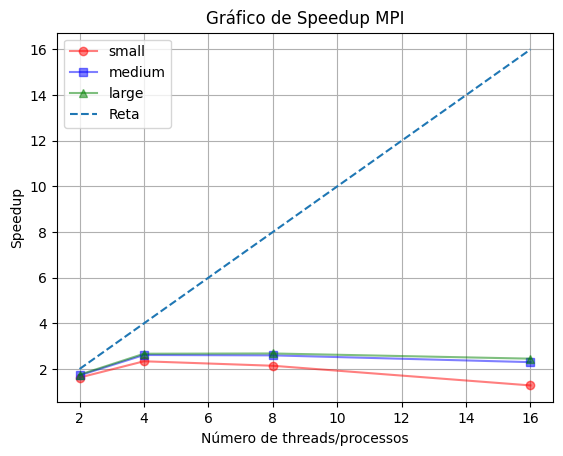

In [20]:
plt.plot(threads, speedups_mpi[0], label='small', color='red', marker='o', alpha=0.5)
plt.plot(threads, speedups_mpi[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads, speedups_mpi[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads, threads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup MPI')
plt.grid(True)
plt.legend()
plt.show()

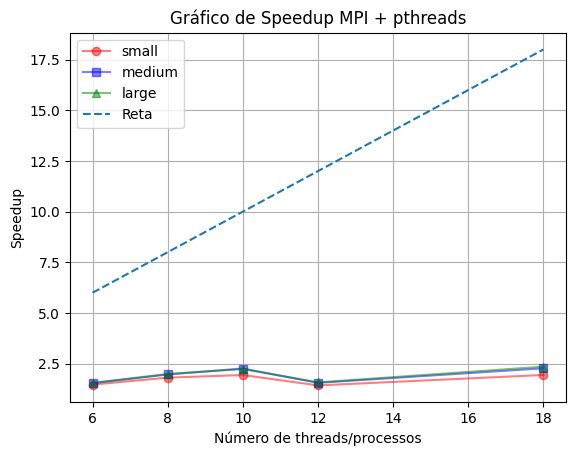

In [22]:
plt.plot(threads_mpi_pthreads, speedups_mpi_pthreads[0], label='small', color='red', marker='o', alpha=0.5)
plt.plot(threads_mpi_pthreads, speedups_mpi_pthreads[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads_mpi_pthreads, speedups_mpi_pthreads[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads_mpi_pthreads, threads_mpi_pthreads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup MPI + pthreads')
plt.grid(True)
plt.legend()
plt.show()